## **1.MeCab 설치**

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

## **2.라이브러리 Import**

In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Mecab

# Mecab 정의
m = Mecab()

## **3. 구글드라이브 마운트**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **4.데이터확인**

In [4]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/Colab Notebooks/refer_data/크롤링이후/clean_total_crawling9.csv'

#pandas read_csv로 불러오기
data = pd.read_csv(filename, index_col= 0)
print(len(data))
data.head()

48018


,reviews,label_kor
index,,
0,힙지로에서는 조금 떨어진 하지만 금요일 저녁에 직장인들이 술 먹기엔 좋은 곳 날씨도...,한식
1,힐링이 필요할 때 가는 곳 힐링이 필요할 때 가는 곳,한식
2,희락갈치는 남대문 갈치골목에 위치한 인기있는 항상 사람이 가득한거 같은 식당입니다 ...,한식
3,흥선대원군의 별장이었던 석파정 근처의 석파랑은 그 스토리와 외관 등 여러가지 이유로...,한식
4,흑돼지덮밥 존맛이당 흑돼지덮밥 존맛이당,한식


In [5]:
data.isnull().sum() #널값확인

reviews      0
label_kor    0
dtype: int64

# 5.데이터 전처리

## 5-1.사용자 사전
주석이 있으면 실행이 안되니 주석을 이곳에 모아줌

In [ ]:
# git hub에서 사용자 사전 코드 불러오기

In [6]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git  

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 802.00 KiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
# content에서 Mecab-ko-for-Google-Colab으로 위치 이동

In [7]:
cd /content/Mecab-ko-for-Google-Colab  

/content/Mecab-ko-for-Google-Colab


In [8]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_220429.sh


In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

In [10]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [11]:
ls user-dic

nnp.csv  person.csv  place.csv  README.md


In [13]:
!pip install jamo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from jamo import h2j, j2hcj

def get_jongsung_TF(sample_text):
    sample_text_list = list(sample_text)
    last_word = sample_text_list[-1]
    last_word_jamo_list = list(j2hcj(h2j(last_word)))
    last_jamo = last_word_jamo_list[-1]
    jongsung_TF = "T"
    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']:
        jongsung_TF = "F"
    return jongsung_TF

In [27]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
  file_data = f.readlines()

word_list = ['가성비', '공기밥', '깍두기', '꿔바로우', '낙곱새', '남자친구','여자친구', '닭도리탕', '델리만쥬', '도토리', '돈까스',
             '또띠아', '뚝배기', '라멘', '리조또', '마카롱', '맛집', '맥앤치즈', '모짜렐라', '몬테크리스토', '밀푀유나베',
             '반세오', '번데기', '부대 찌개', '부대찌개', '부리또', '샌드위치', '세꼬시', '소보루', '수제비', '쉬림프', '슴슴한',
             '아이스크림', '아인슈페너', '앙버터', '에그타르트', '에끌레어', '예쁜', '오꼬노미야끼',
             '오마카세', '오코노미야끼', '잠봉뵈르', '젤라또', '치미창가', '치폴레', '코울슬로', '퀘사디아',
             '퀸아망', '크로아상', '크로플', '크림브륄레', '태국', '토스트', '트러플', '페스트츄리', '피스타치오', '하얀', '학창시절', '한정식',
             '회무침', '월남쌈', '반쎄오', '마라탕', '마라샹궈'
             ]

for word in word_list:
  jongsung_TF = get_jongsung_TF(word)
  line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)
  file_data.append(line)

In [28]:
with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as f:
  for line in file_data:
    f.write(line)
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
  file_new = f.readlines()
file_new

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '가성비,,,,NNP,*,F,가성비,*,*,*,*,*\n',
 '공기밥,,,,NNP,*,T,공기밥,*,*,*,*,*\n',
 '깍두기,,,,NNP,*,F,깍두기,*,*,*,*,*\n',
 '꿔바로우,,,,NNP,*,F,꿔바로우,*,*,*,*,*\n',
 '낙곱새,,,,NNP,*,T,낙곱새,*,*,*,*,*\n',
 '남자 친구,,,,NNP,*,F,남자 친구,*,*,*,*,*\n',
 '닭도리탕,,,,NNP,*,T,닭도리탕,*,*,*,*,*\n',
 '델리만쥬,,,,NNP,*,F,델리만쥬,*,*,*,*,*\n',
 '도토리,,,,NNP,*,F,도토리,*,*,*,*,*\n',
 '돈까스,,,,NNP,*,F,돈까스,*,*,*,*,*\n',
 '또띠아,,,,NNP,*,F,또띠아,*,*,*,*,*\n',
 '뚝배기,,,,NNP,*,F,뚝배기,*,*,*,*,*\n',
 '라멘,,,,NNP,*,T,라멘,*,*,*,*,*\n',
 '리조또,,,,NNP,*,F,리조또,*,*,*,*,*\n',
 '마카롱,,,,NNP,*,T,마카롱,*,*,*,*,*\n',
 '맛 집,,,,NNP,*,T,맛 집,*,*,*,*,*\n',
 '맥앤치즈,,,,NNP,*,F,맥앤치즈,*,*,*,*,*\n',
 '모짜렐라,,,,NNP,*,F,모짜렐라,*,*,*,*,*\n',
 '몬테크리스토,,,,NNP,*,F,몬테크리스토,*,*,*,*,*\n',
 '밀푀유나베,,,,NNP,*,T,밀푀유나베,*,*,*,*,*\n',
 '반세오,,,,NNP,*,F,반세오,*,*,*,*,*\n',
 '번데기,,,,NNP,*,F,번데기,*,*,*,*,*\n',
 '부대 찌개,,,,NNP,*,T,부대 찌개,*,*,*,*,*\n',
 '부대찌개,,,,NNP,*,T,부대찌개,*,*,*,*,*\n',
 '부리또,,,,NNP,*,F,부리또,*,*,*,*,*\n',
 '샌드위치,,,,NNP,*,F,샌드위치,*,*,*,*,

In [29]:
ls tools

add-userdic.sh*  convert_for_using_store.sh*  mecab-bestn.sh*


In [30]:
! ./autogen.sh

Looking in current directory for macros.
configure.ac:2: warning: AM_INIT_AUTOMAKE: two- and three-arguments forms are deprecated.  For more info, see:
configure.ac:2: https://www.gnu.org/software/automake/manual/automake.html#Modernize-AM_005fINIT_005fAUTOMAKE-invocation


In [31]:
!bash ./tools/add-userdic.sh

generating userdic...
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
 cd . && /bin/bash ./config.status Makefile 
config.status: creating Makefile
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./Wikipedia.csv 

In [32]:
!make clean

test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic


In [33]:
!make install

/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./Wikipedia.csv ... 36762
reading ./VCP.csv ... 9
reading ./Inflect.csv ... 44820
reading ./IC.csv ... 1305
reading ./EP.csv ... 51
reading ./Preanalysis.csv ... 5
reading ./MAJ.csv ... 240
reading ./NorthKorea.csv ... 3
reading ./VA.csv ... 2360
reading ./Person.csv ... 196459
reading ./XPN.csv ... 83
reading ./user-nnp.csv ... 196
reading ./Place.csv ... 30303
reading ./VCN.csv ... 7
reading ./CoinedWord.csv ... 148
reading ./user-place.csv ... 2
reading ./NR.csv ... 482
reading ./J.csv ... 416
reading ./XSV.csv ... 23
reading ./Foreign.csv ... 11690
reading ./NNG.csv ... 208524
reading ./ETN.csv ... 14
reading ./XSN.csv ... 124
reading ./Place-address.csv ... 19301
reading ./user-person.csv ... 1
reading ./XR.csv ... 3637
reading ./NP.csv ... 342
reading ./Group.csv ... 3176
reading ./Symbol.csv ... 16
readi

In [34]:
# test
from konlpy.tag import Mecab
mecab = Mecab()
w_list = ['안녕하세요~~ 아 배고프다 오마카세 먹고싶당']
for word in w_list:
  print(mecab.pos(word))

[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EP+EF'), ('~~', 'SY'), ('아', 'IC'), ('배고프', 'VA'), ('다', 'EC'), ('오마카세', 'NNP'), ('먹', 'VV'), ('고', 'EC'), ('싶', 'VX'), ('당', 'EF')]


# 6.라벨별 키워드 추출

In [37]:
for i in data['label_kor'].unique():
  print(i)

한식
해산물
전골
곱창
국수
분식
버거류
타코
아시아음식
디저트
스시
라멘
돈가츠
베이커리
통닭
양식
중식


In [40]:
# 불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/Colab Notebooks/refer_data/크롤링이후/clean_total_crawling9.csv'

# pandas read_csv로 불러오기
data = pd.read_csv(filename, index_col= 0)
print('--------------csv파일을 가져 옵니다.--------------') 


# 불용어 사전 정의
stopwords = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/refer_data/형태소분석데이터/stopwords.csv', encoding = 'cp949')
stopwords_n = list(stopwords['명사'].dropna())
stopwords_v = list(stopwords['동형어'].dropna())
stopwords_list = set(stopwords_n + stopwords_v)
print('stopwords_list: ', '--------------불용어 사전 정의 완료하였습니다.--------------')

# key값을 넣을 리스트
keywords_n = []
keywords_v = []

# top100을 넣을 리스트
keywords_pos_n = []
keywords_pos_v = []

most_number = int(input('라벨별 몇 개의 데이터를 불러올 것인지 입력하세요. : '))

for i in data['label_kor'].unique():
  print('◆ %s 라벨 형태소분석을 시작합니다.◆' %i)

  data_L = data[data['label_kor'] == i] # 입력한 라벨값 데이터를 가져온다.
  print('--------------해당하는 라벨값을 확인합니다.--------------',data_L.head())
  print('--------------','전체 개수는',len(data),'개 입니다.--------------') #전체 데이터수
  print('--------------','해당 라벨의 개수는',len(data_L),'개 입니다.--------------') #해당라벨 데이터수

  # 텍스트 리스트화 
  data_L_list= data_L.reviews.values.tolist()
  print('--------------텍스트를 리스트화 하였습니다.--------------')

  # 한문장으로 만들기
  sentence = '' # 빈 리스트
  for e in data_L_list:
      sentence = sentence + e + '\n' #한줄씩 추가 \n으로 구분
  print('--------------리스트화된 데이터를 한 줄로 수정하였습니다.--------------')

  # 품사 태깅
  pos_d = m.pos(sentence)
  print('--------------',i,'데이터를 품사처리합니다.--------------')

  # 불용어를 제외한 형태소 추출
  tag_n = ["NNG", 'NNP'] # 명사
  tag_v = ['VV', 'VA', 'XR'] # 동형어 

  # 형태소를 넣을 리스트트
  pos_n = [] # 명사
  pos_v = [] # 동형어 
  for p in pos_d:
    if p[0] not in stopwords_list:
      if p[1] in tag_n:
        pos_n.append(p[0]) 
      elif p[1] in tag_v:
        pos_v.append(p[0]) 
      
  print('--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------')

  # 빈도수 & 내림차순 상위정렬
  from collections import Counter
  pos_n_counter = Counter(pos_n)
  pos_v_counter = Counter(pos_v)

  # top 100 추출
  top_pos_n = dict(pos_n_counter.most_common(most_number))
  top_pos_v = dict(pos_v_counter.most_common(most_number))
  print('--------------빈도수 기준 내림차순 완료하였습니다--------------')

  # keyword 리스트화한 변수
  keyword_n = list(top_pos_n.keys())
  keyword_v = list(top_pos_v.keys())

  # append 하면서 17개 카테고리 keyword 변수 생성
  keywords_n.append(keyword_n)
  keywords_v.append(keyword_v)

  # append 하면서 17개 카테고리 top 100 변수 생성
  keywords_pos_n.append(top_pos_n)
  keywords_pos_v.append(top_pos_v)


print('작업을 완료하여 종료합니다.')

--------------csv파일을 가져 옵니다.--------------
stopwords_list:  --------------불용어 사전 정의 완료하였습니다.--------------
라벨별 몇 개의 데이터를 불러올 것인지 입력하세요. : 15
◆ 한식 라벨 형태소분석을 시작합니다.◆
--------------해당하는 라벨값을 확인합니다.--------------                                                  reviews label_kor
index                                                             
0      힙지로에서는 조금 떨어진 하지만 금요일 저녁에 직장인들이 술 먹기엔 좋은 곳 날씨도...        한식
1                          힐링이 필요할 때 가는 곳 힐링이 필요할 때 가는 곳        한식
2      희락갈치는 남대문 갈치골목에 위치한 인기있는 항상 사람이 가득한거 같은 식당입니다 ...        한식
3      흥선대원군의 별장이었던 석파정 근처의 석파랑은 그 스토리와 외관 등 여러가지 이유로...        한식
4                                  흑돼지덮밥 존맛이당 흑돼지덮밥 존맛이당        한식
-------------- 전체 개수는 48018 개 입니다.--------------
-------------- 해당 라벨의 개수는 6410 개 입니다.--------------
--------------텍스트를 리스트화 하였습니다.--------------
--------------리스트화된 데이터를 한 줄로 수정하였습니다.--------------
-------------- 한식 데이터를 품사처리합니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------빈도수 기준 내림

In [41]:
len(keywords_n), len(keywords_v), len(keywords_pos_n), len(keywords_pos_v)

(17, 17, 17, 17)

In [42]:
category_count = len(data['label_kor'].unique())
category_count

17

In [43]:
# 명사, 동형어의 keyword 한 변수에 넣기
keywords = []

for i in range(category_count):
  for j in range(len(keywords_n[i])):
    keywords.append(keywords_n[i][j])
  for k in range(len(keywords_v[i])):
    keywords.append(keywords_v[i][k])


In [44]:
len(keywords)

510

In [45]:
# 명사, 동형어의 counts 한 변수에 넣기
counts_list = []

for i in range(category_count):
  for j in keywords_n[i]:
    counts_list.append(keywords_pos_n[i][j])
  for k in keywords_v[i]:
    counts_list.append(keywords_pos_v[i][k])

In [46]:
len(counts_list)

510

In [47]:
# 명사, 동형어 tag 변수 생성
tag_list = []

for i in range(category_count * most_number * 2):
  if i % (category_count * 2) < category_count:
    tag_list.append('명사')
  else:
    tag_list.append('동형어')

from collections import Counter
Counter(tag_list)

Counter({'명사': 255, '동형어': 255})

In [48]:
len(tag_list)

510

In [49]:
data['label_kor'].unique()

array(['한식', '해산물', '전골', '곱창', '국수', '분식', '버거류', '타코', '아시아음식', '디저트',
       '스시', '라멘', '돈가츠', '베이커리', '통닭', '양식', '중식'], dtype=object)

In [50]:
# 명사, 동형어 label 변수 생성
label_list = []

for i in range(category_count * most_number * 2):
  if i // (most_number * 2) == 0:
    label_list.append('한식')
  elif i // (most_number * 2) == 1:
    label_list.append('해산물')
  elif i // (most_number * 2) == 2:
    label_list.append('전골')
  elif i // (most_number * 2) == 3:
    label_list.append('곱창')
  elif i // (most_number * 2) == 4:
    label_list.append('국수')
  elif i // (most_number * 2) == 5:
    label_list.append('분식')
  elif i // (most_number * 2) == 6:
    label_list.append('버거류')
  elif i // (most_number * 2) == 7:
    label_list.append('타코')
  elif i // (most_number * 2) == 8:
    label_list.append('아시아음식')
  elif i // (most_number * 2) == 9:
    label_list.append('디저트')
  elif i // (most_number * 2) == 10:
    label_list.append('스시')
  elif i // (most_number * 2) == 11:
    label_list.append('라멘')
  elif i // (most_number * 2) == 12:
    label_list.append('돈가츠')
  elif i // (most_number * 2) == 13:
    label_list.append('베이커리')
  elif i // (most_number * 2) == 14:
    label_list.append('통닭')
  elif i // (most_number * 2) == 15:
    label_list.append('양식')
  elif i // (most_number * 2) == 16:
    label_list.append('중식')
  

from collections import Counter
Counter(label_list), len(label_list)

(Counter({'한식': 30,
          '해산물': 30,
          '전골': 30,
          '곱창': 30,
          '국수': 30,
          '분식': 30,
          '버거류': 30,
          '타코': 30,
          '아시아음식': 30,
          '디저트': 30,
          '스시': 30,
          '라멘': 30,
          '돈가츠': 30,
          '베이커리': 30,
          '통닭': 30,
          '양식': 30,
          '중식': 30}),
 510)

In [51]:
# 생성한 변수들 데이터프레임화
seri = pd.Series(keywords) # 시리즈화
df_last = pd.DataFrame(seri)
df_last['counts'] = counts_list
df_last['tag'] = tag_list
df_last['label'] = label_list
df_last.columns = ['keyword','counts', 'tag', 'label']
df_last

# csv 저장
# df_last.to_csv('3번_ver3.5.csv', encoding='cp949')

,keyword,counts,tag,label
0,국물,4638,명사,한식
1,칼국수,4542,명사,한식
2,고기,4494,명사,한식
3,냉면,3224,명사,한식
4,김치,2988,명사,한식
...,...,...,...,...
505,신선,372,동형어,중식
506,짜,356,동형어,중식
507,평범,336,동형어,중식
508,시원,262,동형어,중식


# 7.공통 키워드 추출

## 7-1.명사

In [52]:
# 명사 키워드만 추출
keywords_n_total = []
for i in range(len(keywords_n)):
  for j in keywords_n[i]:
    keywords_n_total.append(j)

In [53]:
len(keywords_n_total)

255

In [54]:
# 빈도수 top 추출
common_count = int(input('추출할 공통키워드 개수를 입력하세요 : '))
from collections import Counter
keyword_n_counter = Counter(keywords_n_total)
top_keyword_n = dict(keyword_n_counter.most_common(common_count))

추출할 공통키워드 개수를 입력하세요 : 30


In [55]:
len(top_keyword_n)

30

In [56]:
# 데이터프레임화
df_last_n = pd.DataFrame(pd.Series(top_keyword_n))
df_last_n = df_last_n.reset_index()
df_last_n.columns = ['keyword','counts']

In [57]:
# 키워드의 전체 카테고리 빈도수 합 추출
keyword_count_n = []
for i in df_last_n['keyword']:
  count = 0
  for j in range(len(keywords_pos_n)):
    if i in keywords_pos_n[j].keys():
      count += keywords_pos_n[j][i]
  keyword_count_n.append(count)

df_last_n['total_counts'] = keyword_count_n

In [58]:
df_last_n

,keyword,counts,total_counts
0,소스,13,17086
1,고기,11,16333
2,국물,9,17062
3,치즈,8,11374
4,면,7,13135
5,양념,6,5498
6,튀김,6,5226
7,육수,4,5949
8,파스타,4,10933
9,볶음밥,4,4040


In [59]:
# 키워드의 형태소 추출
morph_list_n = []
cnt = 0

for i in df_last_n['keyword']:
  for j in data['label_kor'].unique():
    data_new = data[data['label_kor'] == j] 
    # 텍스트 리스트화 
    data_list_new = data_new.reviews.values.tolist()
    # 한문장으로 만들기
    sentence_new = '' # 한문장으로 만들고 뒤에 1을 붙여 구분
    for e in data_list_new:
      sentence_new = sentence_new + e + '\n'
    pos_new = m.pos(sentence_new)

    # 불용어를 제외한 형태소 추출
    tag = ['NNG', 'NNP']    # 해당하는 형태소만 추출
    pos_new_2 = []
    for p in pos_new:
      if p[1] in tag and p[0] not in stopwords_list:
        pos_new_2.append(p)    # 품사 tag 제외한 단어만 append
    print('--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------')

    for k in range(len(pos_new_2)):
      if i == pos_new_2[k][0]:
        morph_list_n.append(pos_new_2[k][1])
        cnt += 1
        break
    
    if len(morph_list_n) == cnt:
      break




--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추

KeyboardInterrupt: ignored

In [ ]:
df_last_n['형태소']= morph_list_n

In [ ]:
df_last_n
# df_last.to_csv('공통키워드_명사.csv', encoding='cp949')

## 7-2.동형어

In [ ]:
# 명사 키워드만 추출
keywords_v_total = []
for i in range(len(keywords_v)):
  for j in keywords_v[i]:
    keywords_v_total.append(j)

In [ ]:
# 빈도수 top 추출
common_count = int(input('추출할 공통키워드 개수를 입력하세요 : '))
from collections import Counter
keyword_v_counter = Counter(keywords_v_total)
top_keyword_v = dict(keyword_v_counter.most_common(common_count))

In [ ]:
# 데이터프레임화
df_last_v = pd.DataFrame(pd.Series(top_keyword_v))
df_last_v = df_last_v.reset_index()
df_last_v.columns = ['keyword','counts']

In [ ]:
# 키워드의 전체 카테고리 빈도수 합 추출
keyword_count_v = []
for i in df_last_v['keyword']:
  count = 0
  for j in range(len(keywords_pos_v)):
    if i in keywords_pos_v[j].keys():
      count += keywords_pos_v[j][i]
  keyword_count_v.append(count)
  
df_last_v['total_counts'] = keyword_count_v

In [ ]:
df_last_v

In [ ]:
# 키워드의 형태소 추출
morph_list_v = []
cnt = 0

for i in df_last_v['keyword']:
  for j in data['label_kor'].unique():
    data_new = data[data['label_kor'] == j] 
    # 텍스트 리스트화 
    data_list_new = data_new.reviews.values.tolist()
    # 한문장으로 만들기
    sentence_new = '' # 한문장으로 만들고 뒤에 1을 붙여 구분
    for e in data_list_new:
      sentence_new = sentence_new + e + '\n'
    pos_new = m.pos(sentence_new)

    # 불용어를 제외한 형태소 추출
    tag = ['VV', 'VA', 'XR']    # 해당하는 형태소만 추출
    pos_new_2 = []
    for p in pos_new:
      if p[1] in tag and p[0] not in stopwords_list:
        pos_new_2.append(p)    # 품사 tag 제외한 단어만 append
    print('--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------')

    for k in range(len(pos_new_2)):
      if i == pos_new_2[k][0]:
        morph_list_v.append(pos_new_2[k][1])
        cnt += 1
        break
    
    if len(morph_list_v) == cnt:
      break




In [ ]:
df_last_v['형태소']= morph_list_v

In [ ]:
df_last_v
# df_last.to_csv('공통키워드_동형어.csv', encoding='cp949')

# 8.키워드를 포함하는 리뷰데이터만 추출
키워드파일에서 키워드를 가져와서 해당하는 키워드가 존재하는 문장만 남기기

In [60]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/Colab Notebooks/refer_data/크롤링이후/clean_total_crawling9.csv'

#pandas read_csv로 불러오기
data = pd.read_csv(filename, index_col= 0)
print(len(data))
data.head()

48018


,reviews,label_kor
index,,
0,힙지로에서는 조금 떨어진 하지만 금요일 저녁에 직장인들이 술 먹기엔 좋은 곳 날씨도...,한식
1,힐링이 필요할 때 가는 곳 힐링이 필요할 때 가는 곳,한식
2,희락갈치는 남대문 갈치골목에 위치한 인기있는 항상 사람이 가득한거 같은 식당입니다 ...,한식
3,흥선대원군의 별장이었던 석파정 근처의 석파랑은 그 스토리와 외관 등 여러가지 이유로...,한식
4,흑돼지덮밥 존맛이당 흑돼지덮밥 존맛이당,한식


In [64]:
# #파일로 불러올 때
# filename = '/content/drive/MyDrive/final project/data/label_keyword.csv'
# #pandas read_csv로 불러오기
# label_keyword = pd.read_csv(filename, index_col= 0, encoding='cp949')
# print(len(label_keyword))
# label_keyword.head()

# 6.에서 바로 가져올 때
label_keyword2 = list(df_last['keyword'])
label_keyword2

['국물',
 '칼국수',
 '고기',
 '냉면',
 '김치',
 '육수',
 '만두',
 '면',
 '게장',
 '반찬',
 '양념',
 '평양냉면',
 '간장',
 '해장국',
 '갈비',
 '깔끔',
 '시원',
 '고소',
 '담백',
 '푸짐',
 '짜',
 '부드럽',
 '매콤',
 '느끼',
 '쫄깃',
 '평범',
 '무난',
 '신선',
 '칼칼',
 '얼큰',
 '회',
 '오징어',
 '장어',
 '국물',
 '방어',
 '소스',
 '양념',
 '해산물',
 '생선',
 '전복',
 '고등어',
 '파스타',
 '술',
 '찜',
 '매운탕',
 '신선',
 '고소',
 '깔끔',
 '시원',
 '느끼',
 '부드럽',
 '푸짐',
 '싱싱',
 '쫄깃',
 '매콤',
 '담백',
 '무난',
 '평범',
 '짜',
 '편하',
 '국물',
 '고기',
 '곰탕',
 '수육',
 '국밥',
 '설렁탕',
 '김치',
 '순두부',
 '갈비',
 '부대찌개',
 '전골',
 '육수',
 '꼬리',
 '점심',
 '양고기',
 '깔끔',
 '시원',
 '담백',
 '부드럽',
 '고소',
 '느끼',
 '짜',
 '얼큰',
 '칼칼',
 '푸짐',
 '든든',
 '매콤',
 '무난',
 '쫄깃',
 '신선',
 '곱창',
 '대창',
 '막창',
 '볶음밥',
 '양념',
 '국물',
 '고기',
 '곱창전골',
 '전골',
 '기름',
 '모듬',
 '구이',
 '염통',
 '부산',
 '소스',
 '고소',
 '느끼',
 '깔끔',
 '신선',
 '쫄깃',
 '볶',
 '매콤',
 '부드럽',
 '무난',
 '담백',
 '평범',
 '시원',
 '질기',
 '편하',
 '푸짐',
 '고기',
 '막국수',
 '면',
 '국물',
 '육수',
 '쌀국수',
 '국수',
 '닭갈비',
 '평양냉면',
 '냉면',
 '수육',
 '메밀',
 '양념',
 '소스',
 '베트남',
 '깔끔',
 '고소',
 '시원',
 '부드럽',
 '쫄깃',
 

In [67]:
label_keyword = label_keyword2
label_keyword = pd.DataFrame(label_keyword2, columns=['keyword'])
label_keyword

,keyword
0,국물
1,칼국수
2,고기
3,냉면
4,김치
...,...
505,신선
506,짜
507,평범
508,시원


In [68]:
label_keyword_list = label_keyword.values.tolist()
print(len(label_keyword_list))
print(type(label_keyword_list))

510
<class 'list'>


In [69]:
# 이중리스트 차원차감
label_keyword_list = sum(label_keyword_list, [])

In [70]:
# 포함하고자 하는 문자열 리스트 생성
# print(label_keyword_list)

# 데이터 프레임 생성
# print(data)

# join 함수를 이용하여 이어주고, contains 함수에 넣기 (| 사용)
# ['게장', '만두', '반찬', '김'] -> ['게장|만두|반찬|김']
keywords = '|'.join(label_keyword_list)
result = data[data['reviews'].str.contains(keywords)]

In [71]:
result

,reviews,label_kor
index,,
0,힙지로에서는 조금 떨어진 하지만 금요일 저녁에 직장인들이 술 먹기엔 좋은 곳 날씨도...,한식
2,희락갈치는 남대문 갈치골목에 위치한 인기있는 항상 사람이 가득한거 같은 식당입니다 ...,한식
3,흥선대원군의 별장이었던 석파정 근처의 석파랑은 그 스토리와 외관 등 여러가지 이유로...,한식
5,흑돼지 편백찜 원 인분 팽이버섯 추가 깻잎 명이나물에 너무 맛있게 잘 싸먹었어요 와...,한식
6,후암시장 근처 만두집 휴일이 일요일에서 월요일로 바꼈다고 한다 가실분들은 참고하시길...,한식
...,...,...
48013,사골마라탕 대학로에서는 마라탕으로 여기를 이기기 쉽지 않다 정말 한글보다 중국어가 ...,중식
48014,마라탕 고기추가 적당히 대중적이고 무난한 마라탕 대학로에서 마라탕 맛집 찾는거 정말...,중식
48015,마귀같은 음식점 음식에 뭐를 넣었는지 자꾸 생각나서 들어가기 전 주기도문을 외우게 ...,중식


In [73]:
#저장하기
result.to_csv('/content/drive/MyDrive/Colab Notebooks/Save_data/Mecab_result3.csv')

# 9.전체 라벨값 수치화해보기

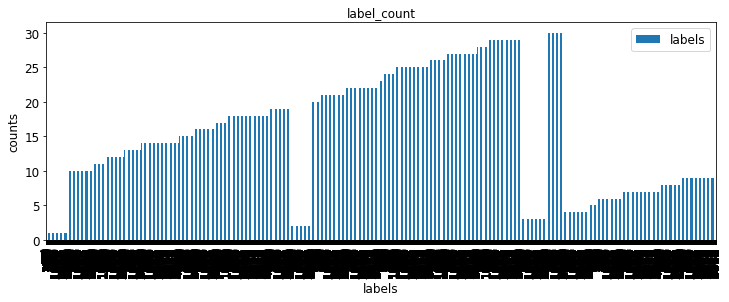

In [ ]:
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = data['label'].plot(kind='bar', title='label_count', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('labels', fontsize=12)          # x축 정보 표시
ax.set_ylabel('counts', fontsize=12)     # y축 정보 표시
ax.legend(['labels', 'counts'], fontsize=12)    # 범례 지정
plt.show()

In [ ]:
data['reviews'].count()

72827

In [ ]:
data['label'].value_counts()

18    4573
7     4127
14    4123
9     3840
25    3710
29    3554
27    3516
22    3453
21    2966
3     2879
4     2831
10    2587
6     2544
1     2440
8     2368
19    2321
16    2269
2     2236
12    2108
30    1952
13    1892
15    1762
26    1559
11    1310
24    1302
17    1195
28    1078
5      820
20     817
23     695
Name: label, dtype: int64

In [ ]:
x = [18, 7, 14, 9, 25, 29, 27, 22, 21, 3, 4, 10, 6, 1, 8, 19, 16, 2, 12, 30, 13, 15, 26, 11, 24, 17, 28, 5, 20, 23]
y = [4573, 4127, 4123, 3840, 3710, 3554, 3516, 3453, 2966, 2879, 2831, 2587, 2544, 2440, 2368, 2321, 2269, 2236, 2108, 1952, 1892, 1762, 1559, 1310, 1302, 1195, 1078, 820, 817, 695]

<BarContainer object of 30 artists>

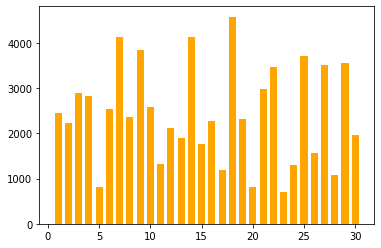

In [ ]:
plt.bar(x, y, width=0.7, color="orange")

In [ ]:
# 평균값 :2428 -> 2500으로 데이터를 맞추기

# 반복문적용


In [ ]:
# import 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Mecab

# Mecab 정의
m = Mecab()

# 구글드라이브연동
from google.colab import drive
drive.mount('/content/drive')

cnt = 1 #시작 위치지정

while cnt < 31 :
  print('◆ %d번에 해당하는 라벨 형태소분석을 시작합니다.◆' % cnt)

  #불러올 파일의 경로를 filename 변수에 저장
  filename = './drive/MyDrive/Colab Notebooks/refer_data/clean_total_crawling.csv'

  #pandas read_csv로 불러오기
  data = pd.read_csv(filename, index_col= 0)
  print('--------------csv파일을 가져 옵니다.--------------') #데이터 확인

  data_L = data[data['label'] == cnt] # 입력한 라벨값 데이터를 가져온다.
  print('--------------해당하는 라벨값을 확인합니다.--------------',data_L.head())
  print('--------------','전체 개수는',len(data),'개 입니다.--------------') #전체 데이터수
  print('--------------','해당 라벨의 개수는',len(data_L),'개 입니다.--------------') #해당라벨 데이터수

  # 텍스트 리스트화 
  data_L_list= data_L.reviews.values.tolist()
  print('--------------텍스트를 리스트화 하였습니다.--------------')

  # 한문장으로 만들기
  sentence = '' # 빈 리스트
  for e in data_L_list:
      sentence = sentence + e + '\n' #한줄씩 추가 \n으로 구분
  print('--------------리스트화된 데이터를 한 줄로 수정하였습니다.--------------')

  # 품사 태깅
  pos_d = m.pos(sentence)
  print('--------------',cnt,'번 데이터를 품사처리합니다.--------------')

# 불용어 사전 사용
  stopwords_filename = open('/content/drive/MyDrive/Colab Notebooks/refer_data/stopwords.csv', 'r', encoding='cp949')

  stopwords_list = []
  for line in stopwords_filename.readlines():
    stopwords_list.append(line.rstrip())
    
  stopwords_filename.close()

  print('stopwords_list: ', '--------------불용어 사전 정의 완료하였습니다.--------------')

  # 불용어를 제외한 형태소 추출
  tag = ["NNG", 'NNP', 'VV', 'VA', 'XR'] #해당하는 형태소만 추출
  pos = []
  for p in pos_d[:]:
    if p[1] in tag and p[0] not in stopwords_list:
      pos.append(p[0]) # 품사 tag 제외한 단어만 append
  print('--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------')

  # 빈도수 & 내림차순 상위정렬
  from collections import Counter
  pos_counter = Counter(pos)

  # top 500 추출
  top_pos = dict(pos_counter.most_common(500))
  print('--------------빈도수 기준 내림차순 완료하였습니다--------------')

  # 형변환
  seri = pd.Series(top_pos) # 시리즈화
  df = pd.DataFrame(seri) # 데이터프레임화
  print('--------------데이터를 데이터프레임화 완료하였습니다.--------------')

  # 라벨링
  df['label'] = cnt
  print('--------------라벨추가완료하였습니다.--------------')

  # 형태소가 setindex가 되었기에 setindex를 초기화
  df = df.reset_index()
  print('--------------set_index를 초기화합니다.--------------')

  # 컬럼 지정
  df.columns = ['keyword','counts', 'label']
  print('--------------컬럼지정 완료하였습니다.--------------')

  # csv저장
  df.to_csv(f'./drive/MyDrive/Colab Notebooks/Save_data/{cnt}.csv', index = False)
  print('--------------csv파일로 저장완료하였습니다.--------------')

  print('◆ %d번에 해당하는 라벨 형태소분석을 완료하였습니다.--------------' % cnt)

  # +1 추가
  cnt += 1 

print('작업을 완료하여 종료합니다.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
◆ 1번에 해당하는 라벨 형태소분석을 시작합니다.◆
--------------csv파일을 가져 옵니다.--------------
--------------해당하는 라벨값을 확인합니다.--------------                                              reviews  label
0  호반_한식주점부문 맛집 2   최초방문_ 21년 12월 최근방문_ 22년 11월  ...      1
1  이번엔 도가니무침을 먹어보았는데 크기도 크고 양도 많았다  맛도 딱 소주안주로 좋았...      1
2                                         병어찜 순대 낙원동      1
3        여전히 종로3가에서 최고의 맛집은 호반이다  우설수육은 정말 최고 미쳤다         1
4  애정하는 종로  호반 의 우거지국  식사 메뉴이다 고기를 삶아내니 육수가 기본적으로...      1
-------------- 전체 개수는 72827 개 입니다.--------------
-------------- 해당 라벨의 개수는 2440 개 입니다.--------------
--------------텍스트를 리스트화 하였습니다.--------------
--------------리스트화된 데이터를 한 줄로 수정하였습니다.--------------
-------------- 1 번 데이터를 품사처리합니다.--------------
stopwords_list:  --------------불용어 사전 정의 완료하였습니다.--------------
--------------불용어 제거 후 형태소 추출을 완료하였습니다.--------------
--------------빈도수 기준 내림차순 완료하였